---
title: Clustering
jupyter: python3
author: "Grace Hyland"
format:
  html:
    code-fold: true
editor: visual
---

## Introduction

In this part of the project I will be clustering a data point for each NHL team from the 2022 season based on the 7 features in the dataset that I have been previously working with. With the clustering analysis, I aim to elucidate the number of categories of teams based on quality of play in the season. There are traditionally thought to be 3 main types of teams: playoff teams, teams that are in contention and miss the playoffs, and teams that are out of playoff contention most of the season. Finding the ideal number of clusters and seeing if these clusters align with the categories of teams will give insight as to how accurate this assertion  is.

## Theory

Clustering is an unsupervised machine learning model, meaning that the data that the model is trained on does not have labels. The model is therefore searching for innate similarities and differences between data points in the data set to group them by. There is also no set target to achieve with the model. A major objective, and the one I have in this tab of the portfolio, is to determine the number of clusters in a dataset.

### K-Means

There are many different methods of clustering based on features but I will be looking at 3 specifically in this analysis. The first of the three is K-Means clustering. In K-Means clustering, a set number (based on a hyperparameter) of centroids are set within the data and each data point is assigned to the centroid with the closest mean. The centroid of the cluster is considered the most representative datapoint of the cluster.

In K-means clustering regular Euclidean distance is not used, but rather squared Euclidean distances are minimized in the cluster assigning process. In the first round of clustering, random centroids (number is based on a hyperparameter) are assigned within the data and all observations are assigned to a centroid. With the newly assigned clusters, new centroids are calculated as the average value of the observations in the cluster and points are reassigned based on distance to the new centroids. This process is repeated until calculating new centroids does not change the cluster assignment.

### DBSCAN

The second is DBSCAN. In DBSCAN clustering, density of points is used to make clusters. Groups of points that are located very close together are grouped in a cluster together and are typically separated by areas of low point density. DBSCAN clustering also marks outliers which are points that are not close enough to any other points to have a cluster.

DBSCAN clustering is useful for data sets with unusual patterns because it can create clusters that are not separated by simple geographic shapes.

### Hierarchical Clustering

The third is hierarchical clustering. In agglomerative hierarchical clustering, the model moves through a series of steps in which the two most similar points are clustered together and then the most similar clusters are merged together until the number of clusters is sufficiently small. There is also division hierarchical clustering in which all of the data points start in one cluster and are separated down the hierarchy. 

The optimal number of clusters can be determined using hyperparameter tuning. A major difference between hierarchical clustering and other methods is that hierarchical clustering does not assume an assigned number of clusters. 

## Method


In [1]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.cluster
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.manifold import TSNE

To start the process of finding the best clusters in the data, I imported the team power point data, removed the label column, and created a feature_matrix. I decided to use the variables that were created on the Dimensionality Reduction tab using TSNE as the observations for clustering so that the clusters will be easy to visualize in two dimensions.

In [34]:
df=pd.read_csv("../data/01-modified-data/team_pp_data_point_bracket_clean.csv")

label = df['points_cat'].copy()
df=df.drop(columns=['Unnamed: 0','points_cat'])
df_embedded=TSNE(n_components=2,learning_rate='auto',init='random',perplexity=15).fit_transform(df)

features=df.columns
feature_matrix = df[features].copy()

embedd_df=pd.DataFrame(df_embedded)

labeled_features=pd.concat((embedd_df,label), axis=1, join='inner')
labeled_features.columns=['feature_1','feature_2','label']
print(labeled_features)



    feature_1  feature_2     label
0   -3.854289   4.747375  mid_tier
1   -6.185002   5.292325   over100
2   -4.212695   8.358073   under80
3   -3.012514  10.011864   under80
4   -5.152484   3.917608  mid_tier
5   -3.310389   5.184929  mid_tier
6   -5.652327   7.284412   over100
7   -6.331969   6.676617  mid_tier
8   -3.931947   8.989484  mid_tier
9   -4.530917  10.714497   over100
10  -4.319849  10.348486  mid_tier
11  -1.310789  10.292958   under80
12  -6.330052   6.191101  mid_tier
13  -4.581445   9.385482  mid_tier
14  -5.106497   9.733096   over100
15  -6.945577   7.511106   over100
16  -2.449926   4.417172   over100
17  -6.483069   8.158342   over100
18  -3.496441   8.232561   under80
19  -5.681571   8.507524   over100
20  -2.056978   8.668019   over100
21  -1.902181   9.896543   under80
22  -2.125180   6.755563   under80
23  -3.321953  11.137379   under80
24  -0.668504   9.190001   over100
25  -4.917902   4.069370  mid_tier
26  -3.683078   5.253610  mid_tier
27  -2.926841   8.12

### K-Means

Using the feature matrix generated above with TSNE, I then used some distance caluclations to determine the best number of clusters to use with this data in K-means clustering. I iterated over the range 1 to 11 for the value of number of clusters in a K-Means cluster model and calculated the given models distortions and inertias.

In [3]:
K=range(1,11)
distortions=[]
inertias=[]

for k in K:
    model=sklearn.cluster.KMeans(n_clusters=k).fit(df_embedded)
    model.fit(df_embedded)

    inertias.append(model.inertia_)
    distortions.append(sum(np.min(cdist(df_embedded, model.cluster_centers_, 'euclidean'), axis=1)) / df_embedded.shape[0])

/Users/gracehyland/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/gracehyland/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/gracehyland/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/gracehyland/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_

These values for distortions and inertias can then be used to create elbow plots to determine the ideal number of clusters. First, I had to make a data frame that included the number of clusters, the distortion values, and the inertia values.

I then graphed both distortion and inertia against the number of clusters used to creat an elbow plot.

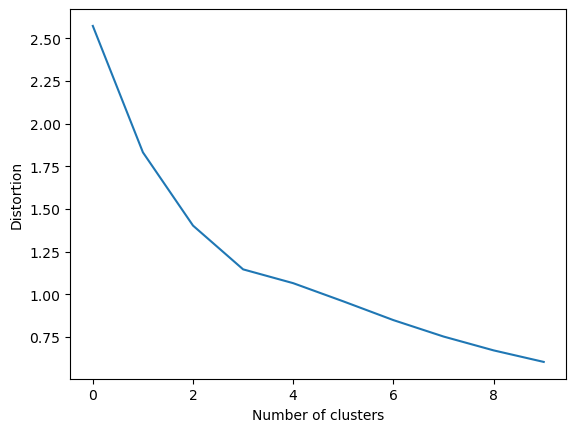

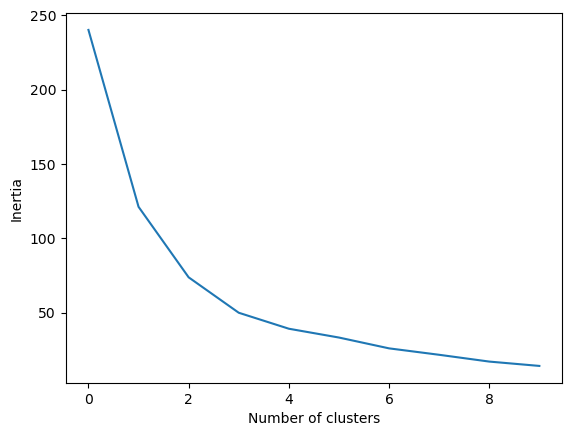

In [5]:
K=[1,2,3,4,5,6,7,8,9,10]


df2=pd.DataFrame(
    {'K': K,
     'distortions': distortions,
     'inertias': inertias
     }
)
plt.plot(df2['distortions'])
plt.xlabel(xlabel="Number of clusters")
plt.ylabel(ylabel="Distortion")
plt.show()

plt.plot(df2['inertias'])
plt.xlabel(xlabel="Number of clusters")
plt.ylabel(ylabel="Inertia")
plt.show()

Both the inertia plot and the distortion plot show a leveling off after the value of three clusters without much improvement in the similarity of the clusters beyond three. Given this, the ideal number of clusters for this data when using K-Means clustering is three.

### Hierarchical clustering

Using the same feature_matrix as above, I calculated the silhouette score for each value of the hyperparameter nmax in agglomerative hierachical clustering. This hyperparameter dictates how many steps the model can move up the hierarchy when merging clusters together to create more clusters. I evaluated the model for the range 0 to 10 and added the silhouette score for each value to a list.

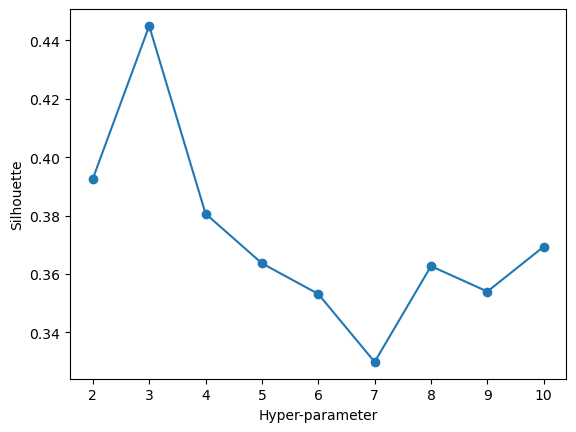

OPTIMAL PARAMETER= 3


In [34]:
nmax=10
sil_max=0
df4=np.ascontiguousarray(df_embedded)

params=[]
sil_scores=[]
for k in range(2,nmax+1):
    model=sklearn.cluster.AgglomerativeClustering(n_clusters=k).fit(df4)
    labels=model.labels_

    sil_scores.append(sklearn.metrics.silhouette_score(df4, labels))
    params.append(k)

    if(sil_scores[-1]>sil_max):
        opt_param=k
        sil_max=sil_scores[-1]
        opt_labels=labels

fig, ax = plt.subplots()
ax.plot(params, sil_scores, "-o")
ax.set(xlabel='Hyper-parameter', ylabel='Silhouette')
plt.show()


print("OPTIMAL PARAMETER=", opt_param)

Using the list of slihouette scores, I made a plot of silhouette score against nmax values and found that the silhouette score maxes out when nmax is equal to three. Therefore the optimal hyperparameter is nmax=3.

## Results

After hyperparameter tuning was complete, I was able to perform both methods of clustering on the data and compare the results.

### Clustering the data: K-Means

Using the number of clusters value of three, I trained a clustering model on my dataset and found the following clusters were formed:

/Users/gracehyland/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


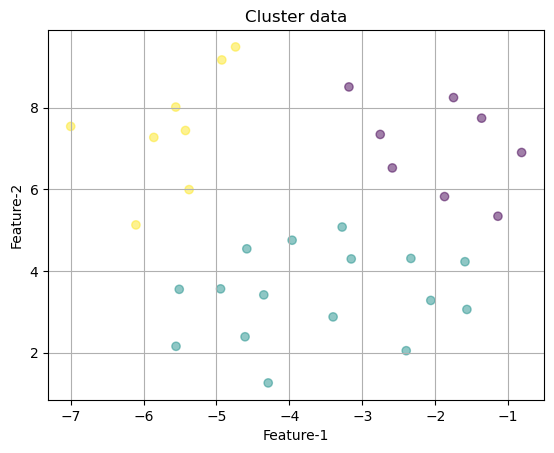

In [41]:
model=sklearn.cluster.KMeans(n_clusters=3).fit(df_embedded)
labels=model.predict(df_embedded)

fig, ax = plt.subplots()
ax.scatter(df_embedded[:,0], df_embedded[:,1],c=labels, alpha=0.5) 
ax.set(xlabel='Feature-1', ylabel='Feature-2',
title='Cluster data')
ax.grid()
plt.show()

### Clustering the data: Agglomerative Clustering

I then used the optimal hyperparameter nmax=3 for agglomerative clustering and found the following clusters as a result:

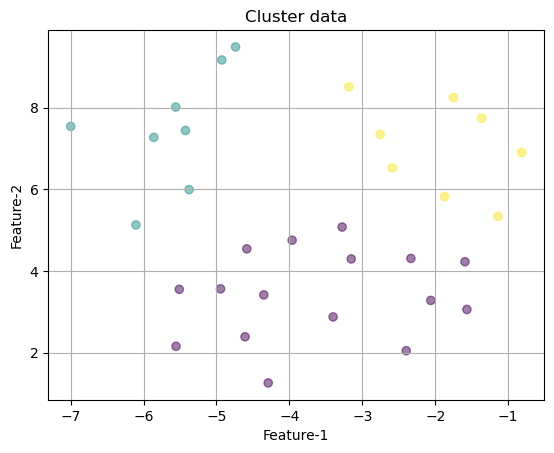

In [42]:
model = sklearn.cluster.AgglomerativeClustering(n_clusters=3).fit(df_embedded)
labels=model.labels_

fig, ax = plt.subplots()
ax.scatter(df_embedded[:,0], df_embedded[:,1],c=labels, alpha=0.5) 
ax.set(xlabel='Feature-1', ylabel='Feature-2',
title='Cluster data')
ax.grid()
plt.show()

Interestingly, both K-Means and Agglomerative Clustering (after hyperparameter) tuning produce the same number of clusters and the assigned clusters are identical.

### Features Plotted with Target Labels

After comparing the two clustering methods to each other I decided to compare the clusters formed by the models to categorical point value labels that represent regular season success.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


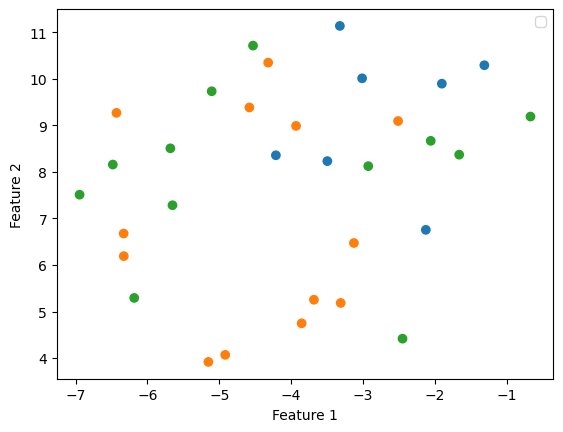

In [45]:
colors = {'under80':'tab:blue', 'mid_tier':'tab:orange', 'over100':'tab:green'}

plt.scatter(labeled_features['feature_1'],labeled_features['feature_2'],c=labeled_features['label'].map(colors))
plt.xlabel(xlabel="Feature 1")
plt.ylabel(ylabel="Feature 2")
plt.show()

These three groupings do not match up with the clusters formed by the models. The blue points on the scatter plot representing teams that finished the season with 80 points or fewer are clustered together towards the top right corner, but the teams that finished the season between 80 and 100 (orange) and the teams that finished with over 100 points (green) are pretty interspersed with one another.

## Conclusions